## 1. Importing Libraries 

In [1]:
import re
import nltk
import spacy
import warnings
import gensim
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from gensim.utils import simple_preprocess
from nltk import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

ps = PorterStemmer()
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Loading the Dataset

In [2]:
# Load the datasets
true = pd.read_csv('True/True.csv')
fake = pd.read_csv('Fake/Fake.csv')

# Add a column to indicate whether the news is fake or true
true['fake'] = 0
fake['fake'] = 1

# Combine the true and fake DataFrames
df = pd.concat([true, fake], ignore_index=True)

# Drop the unnecessary columns
df = df.drop(columns=['date', 'subject', 'text'])

# Shuffle the DataFrame
df = df.sample(frac=1)

# Check for null values
# print(df.isnull().sum())

# Extract titles
titles = np.array(df['title'])

# Display the head of the DataFrame and the titles array
print(df.head())
# print(titles)


                                                   title  fake
10824  Trump vows to sue Cruz over birthplace if 'fal...     0
33034  LEFTIST MEDIA DESTROYED Mike Flynn, Cracked Jo...     1
27126   Former GOP Rep. Says Electing President Obama...     1
44576  Keiser Report: The ‘Gaddafi-like’ Political Ca...     1
14846  Japan's PM says North Korea still developing m...     0


## 3. Data Preprocessing

In [3]:
corpus = []

for i in tqdm(range(len(titles))):
  news = re.sub(r'^a-zA-Z', '', titles[i])        # Fix the regex to retain only letters
  news = word_tokenize(news.lower())
  news = ' '.join([ps.stem(word) for word in news if not word in stopwords.words('english')])
  news = nlp(news).vector
  corpus.append(news)

X = np.array(corpus)

# Split the data into training and testing sets

X_train = X[:40000]
y_train = df['fake'][:40000]
X_test  = X[40000:]
y_test  = df['fake'][40000:]

100%|████████████████████████████████████████████████████████████████████████████| 44898/44898 [13:38<00:00, 54.84it/s]


In [6]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 96) (40000,)
(4898, 96) (4898,)


## 4. Training the Classifier

In [7]:
# Train the logistic regression model

classifier = LogisticRegression(random_state = 1, max_iter = 50)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=50, random_state=1)

## 5. Model evaluation 

[[2038  304]
 [ 384 2172]]
Accuracy :  85.95


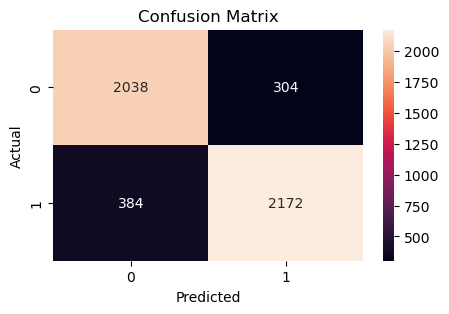

In [9]:
# Predict the test set results
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix and accuracy
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy : ' , round(accuracy_score(y_test,y_pred)*100,2))

plt.figure(figsize = (5,3))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()